In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import time
from sklearn.linear_model import LinearRegression
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
start = time.time()
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80026ba215c9965e6260663fff8da556


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | manhuacu
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | kikwit
Processing Record 12 of Set 1 | yenotayevka
Processing Record 13 of Set 1 | guiratinga
Processing Record 14 of Set 1 | muravlenko
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | esso
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | faya
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Se

Processing Record 38 of Set 4 | chernyshevskiy
Processing Record 39 of Set 4 | roald
Processing Record 40 of Set 4 | tsabong
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | praia
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | quelimane
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | leczna
Processing Record 49 of Set 4 | dickinson
Processing Record 50 of Set 4 | boende
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | porto santo
Processing Record 3 of Set 5 | gouyave
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | unai
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | lorengau
Processing Record 10 of Set 5 | 

Processing Record 33 of Set 8 | coari
Processing Record 34 of Set 8 | bulgan
Processing Record 35 of Set 8 | matagami
Processing Record 36 of Set 8 | beringovskiy
Processing Record 37 of Set 8 | almunecar
Processing Record 38 of Set 8 | izvoru crisului
Processing Record 39 of Set 8 | pavilosta
Processing Record 40 of Set 8 | cabra
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | kloulklubed
Processing Record 43 of Set 8 | oktyabrskiy
Processing Record 44 of Set 8 | ust-uda
Processing Record 45 of Set 8 | bat khela
Processing Record 46 of Set 8 | nanortalik
Processing Record 47 of Set 8 | ust-nera
Processing Record 48 of Set 8 | kidal
Processing Record 49 of Set 8 | ferrol
Processing Record 50 of Set 8 | sao paulo
Processing Record 1 of Set 9 | lillooet
Processing Record 2 of Set 9 | mamou
Processing Record 3 of Set 9 | nakhon si thammarat
Processing Record 4 of Set 9 | verkhnyaya inta
Processing Record 5 of Set 9 | dunedin
Processing Record 6 of Set 9 | nizwa
Proc

Processing Record 17 of Set 12 | marsh harbour
Processing Record 18 of Set 12 | north platte
Processing Record 19 of Set 12 | safaga
Processing Record 20 of Set 12 | pitanga
Processing Record 21 of Set 12 | huayucachi
Processing Record 22 of Set 12 | gotsu
Processing Record 23 of Set 12 | khani
Processing Record 24 of Set 12 | cidreira
Processing Record 25 of Set 12 | aliwal north
Processing Record 26 of Set 12 | mayo
Processing Record 27 of Set 12 | taltal
Processing Record 28 of Set 12 | nyurba
Processing Record 29 of Set 12 | alanya
Processing Record 30 of Set 12 | pemba
Processing Record 31 of Set 12 | matelandia
Processing Record 32 of Set 12 | sitka
Processing Record 33 of Set 12 | praia da vitoria
Processing Record 34 of Set 12 | lokken verk
City not found. Skipping...
Processing Record 35 of Set 12 | arman
Processing Record 36 of Set 12 | green river
Processing Record 37 of Set 12 | araouane
Processing Record 38 of Set 12 | northam
Processing Record 39 of Set 12 | mogadouro
Pro

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame and reorder the columns.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-04-07 17:54:00,34.6391,-120.4579,87.69,31,0,3.00
1,Atuona,PF,2022-04-07 17:51:38,-9.8000,-139.0333,79.38,71,16,15.61
2,Manhuacu,BR,2022-04-07 17:54:00,-20.2581,-42.0336,76.10,84,45,2.73
3,Albany,US,2022-04-07 17:50:43,42.6001,-73.9662,48.38,91,100,10.00
4,Rikitea,PF,2022-04-07 17:54:01,-23.1203,-134.9692,79.83,63,6,14.70
5,Cape Town,ZA,2022-04-07 17:51:23,-33.9258,18.4232,61.21,71,0,18.41
6,Punta Arenas,CL,2022-04-07 17:50:40,-53.1500,-70.9167,46.51,61,0,10.36
7,Tiksi,RU,2022-04-07 17:54:01,71.6872,128.8694,-12.14,100,88,1.61
8,Saint-Philippe,RE,2022-04-07 17:54:02,-21.3585,55.7679,76.59,85,39,12.26
9,Tabou,CI,2022-04-07 17:54:02,4.4230,-7.3528,82.58,76,98,7.85


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/07/22'

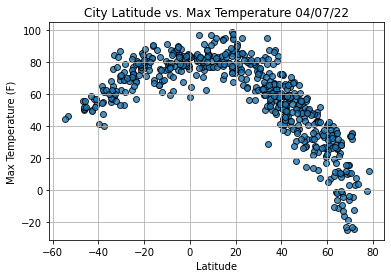

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


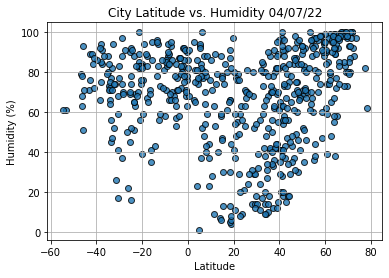

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

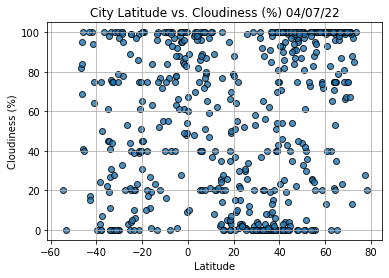

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

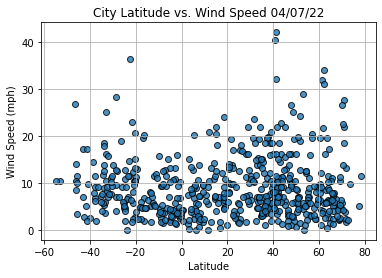

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Display total computational time.
end = time.time()
total_time = end - start
print(f"Total time elapsed = {total_time / 60:.2f} minutes")

Total time elapsed = 2.94 minutes
